In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import seaborn as sns

In [4]:
path_clinical = 'raw_data/clinicaltrial_data.csv'
path_drug = 'raw_data/mouse_drug_data.csv'
clinical_df = pd.read_csv(path_clinical)
drug_df = pd.read_csv(path_drug)

In [13]:
clinical_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
drug_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [7]:
drug_response_df = clinical_df.merge(drug_df, on='Mouse ID')
drug_response_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [11]:
rx_rsp = drug_response_df.set_index(['Drug', 'Timepoint'])
rx_rsp = rx_rsp['Tumor Volume (mm3)'].to_frame()
rx_rsp.reset_index(level=1, inplace=True)
rx_rsp.reset_index(inplace=True)
rx_rsp.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,45.651331
2,Capomulin,10,43.270852
3,Capomulin,15,43.784893
4,Capomulin,20,42.731552


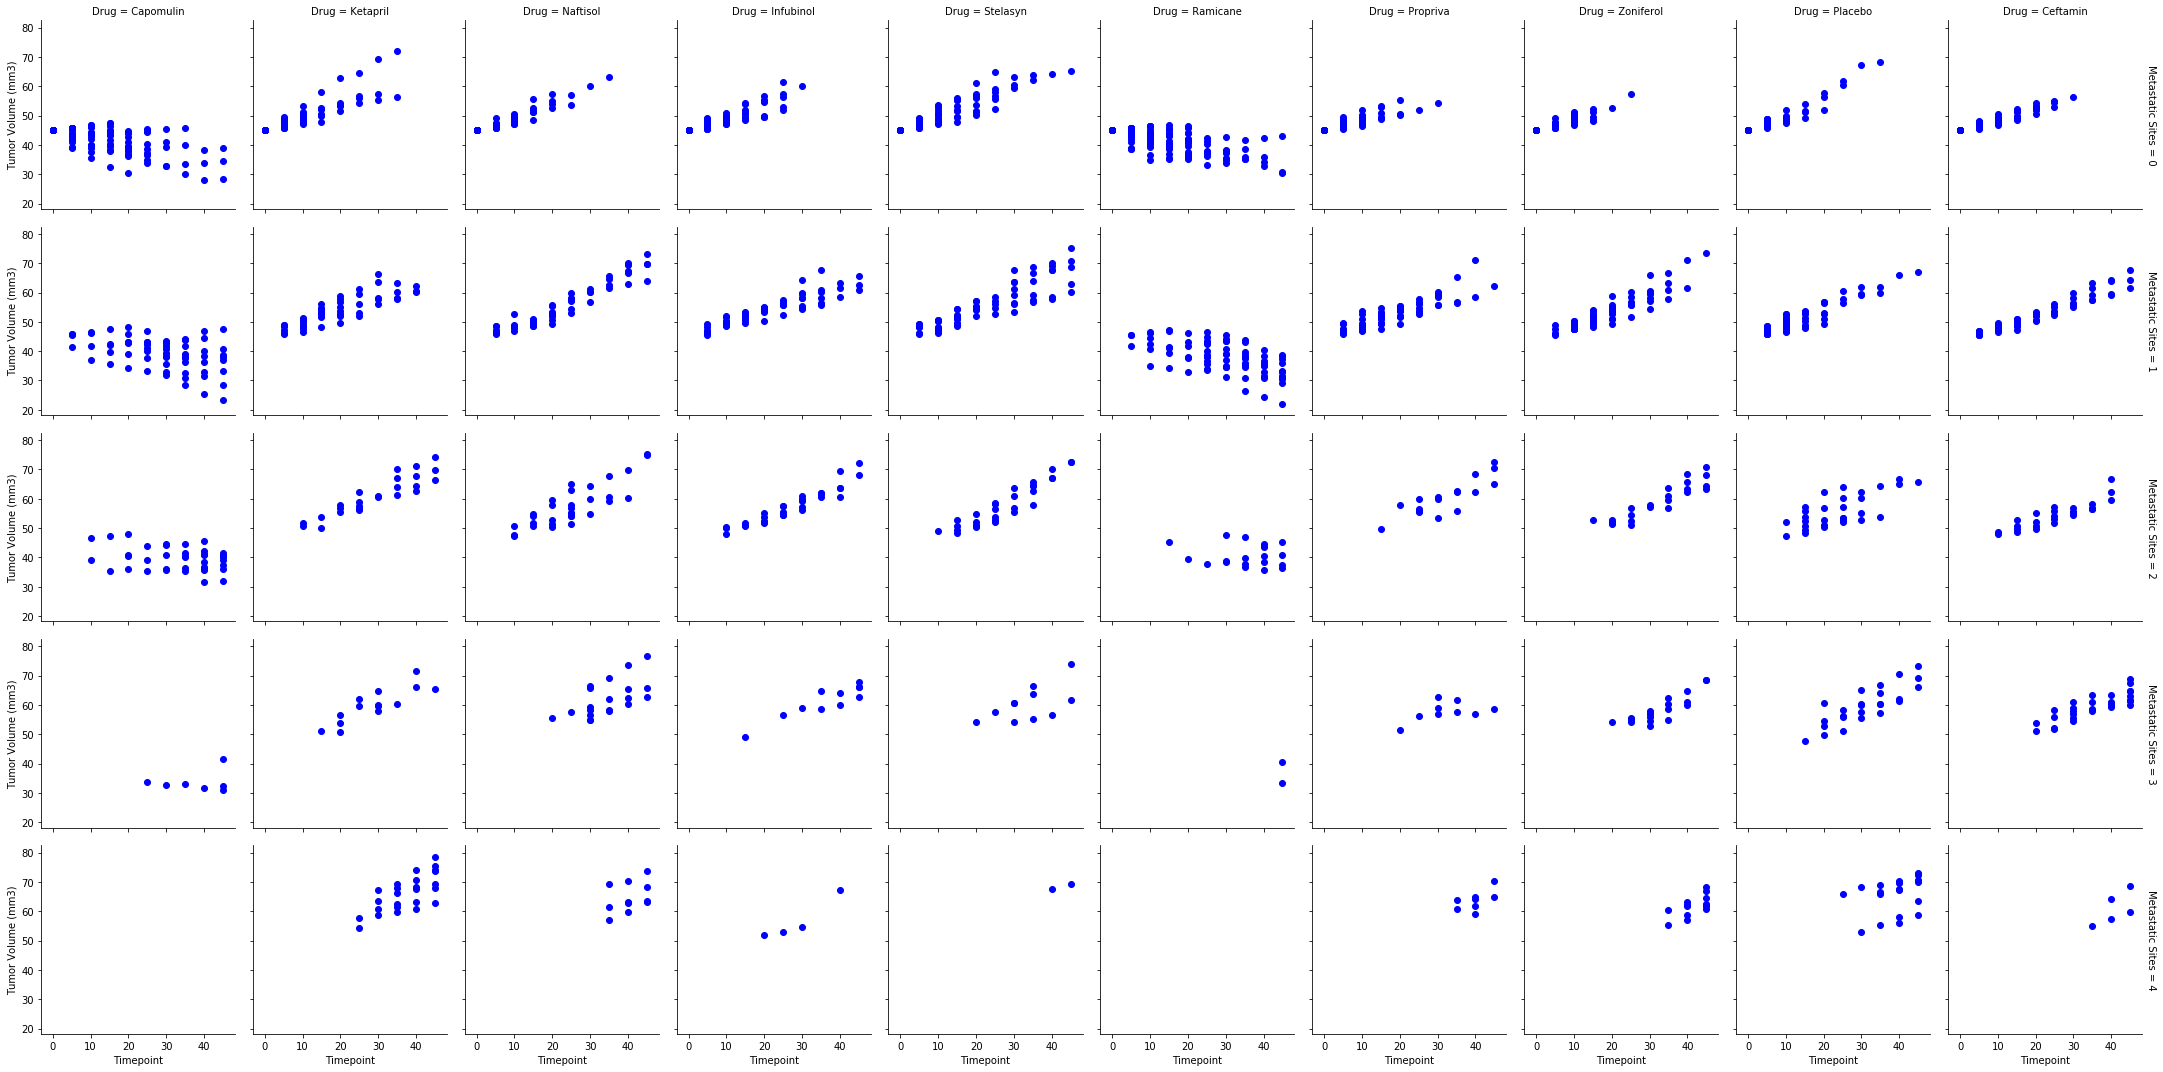

In [18]:

g = sns.FacetGrid(drug_response_df, col='Drug', row='Metastatic Sites', margin_titles=True, sharey=True, sharex=True)
g = g.map(plt.scatter, "Timepoint", "Tumor Volume (mm3)", color="b")
    

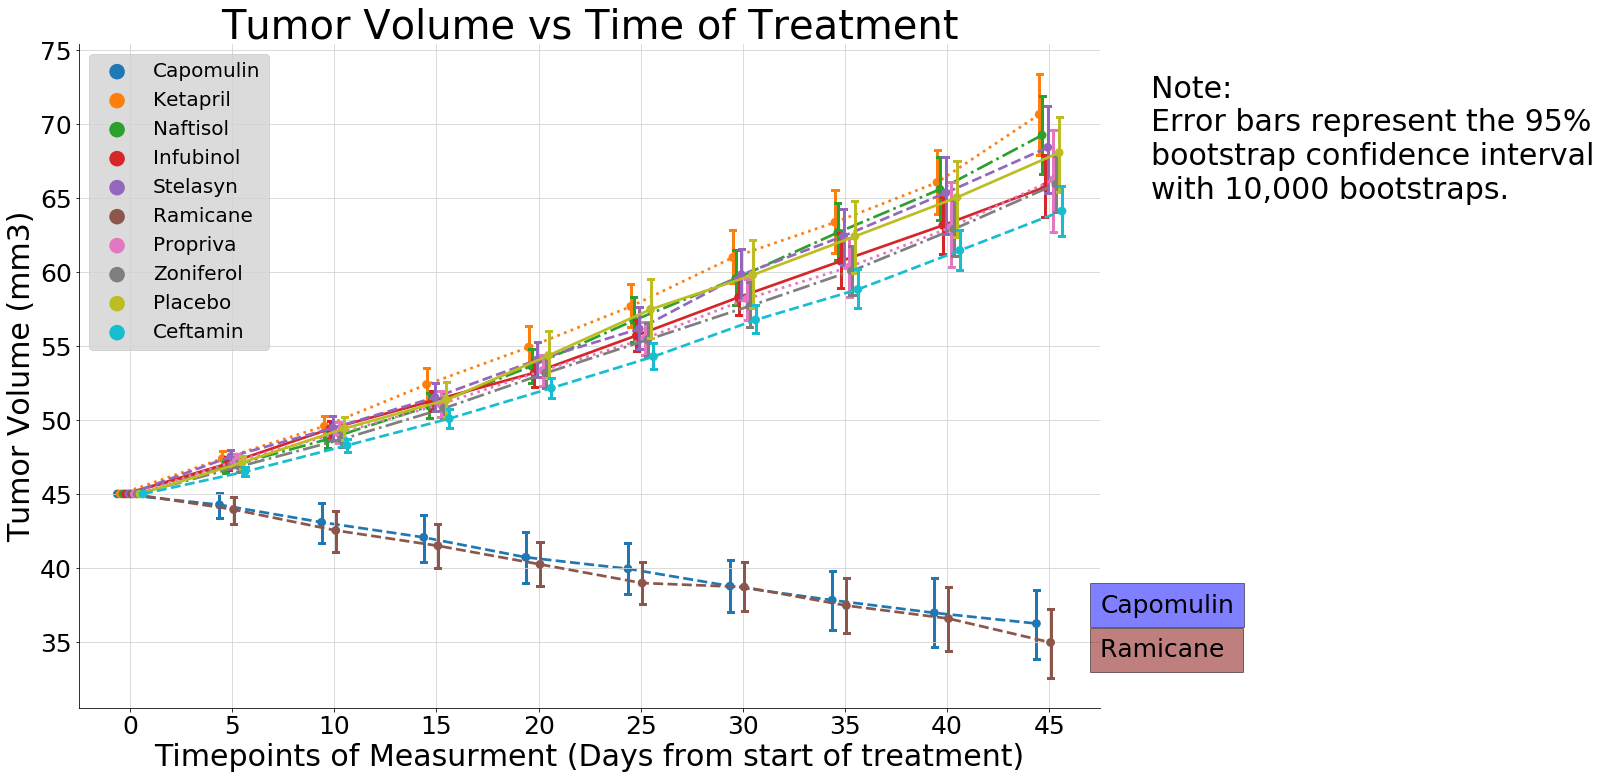

In [101]:
g = sns.factorplot(x='Timepoint',
                   y='Tumor Volume (mm3)',
                   hue='Drug',
                   data=drug_response_df,
                   size=10,
                   aspect=1.5,
                   ci=95,
                   n_boot=10000,
                   legend=False,
                   errwidth=3,
                   capsize=.05,
                   dodge=True,
                   linestyles=['--',':','-.','-','--','--',':','-.','-','--']
                  )
ax = g.ax
ax.text(10,65,'Note: \nError bars represent the 95% \nbootstrap confidence interval \nwith 10,000 bootstraps.').set_fontsize(30)
ax.text(9.5,37, 'Capomulin', bbox=dict(facecolor='blue', alpha=.5)).set_fontsize(25)
ax.text(9.5,34, 'Ramicane ', bbox=dict(facecolor='maroon', alpha=.5)).set_fontsize(25)
ax.legend(loc='upper left', fontsize=20, markerscale=2, frameon=True, facecolor='lightgrey')
ax.set_title('Tumor Volume vs Time of Treatment').set_fontsize(40)
ax.grid(color='lightgrey')
ax.set_xlabel('Timepoints of Measurment (Days from start of treatment)').set_fontsize(30)
ax.set_ylabel('Tumor Volume (mm3)').set_fontsize(30)
ax.tick_params(which='major', labelsize=25)
ax.set_facecolor("white")
g.savefig('tumor_vol.png')

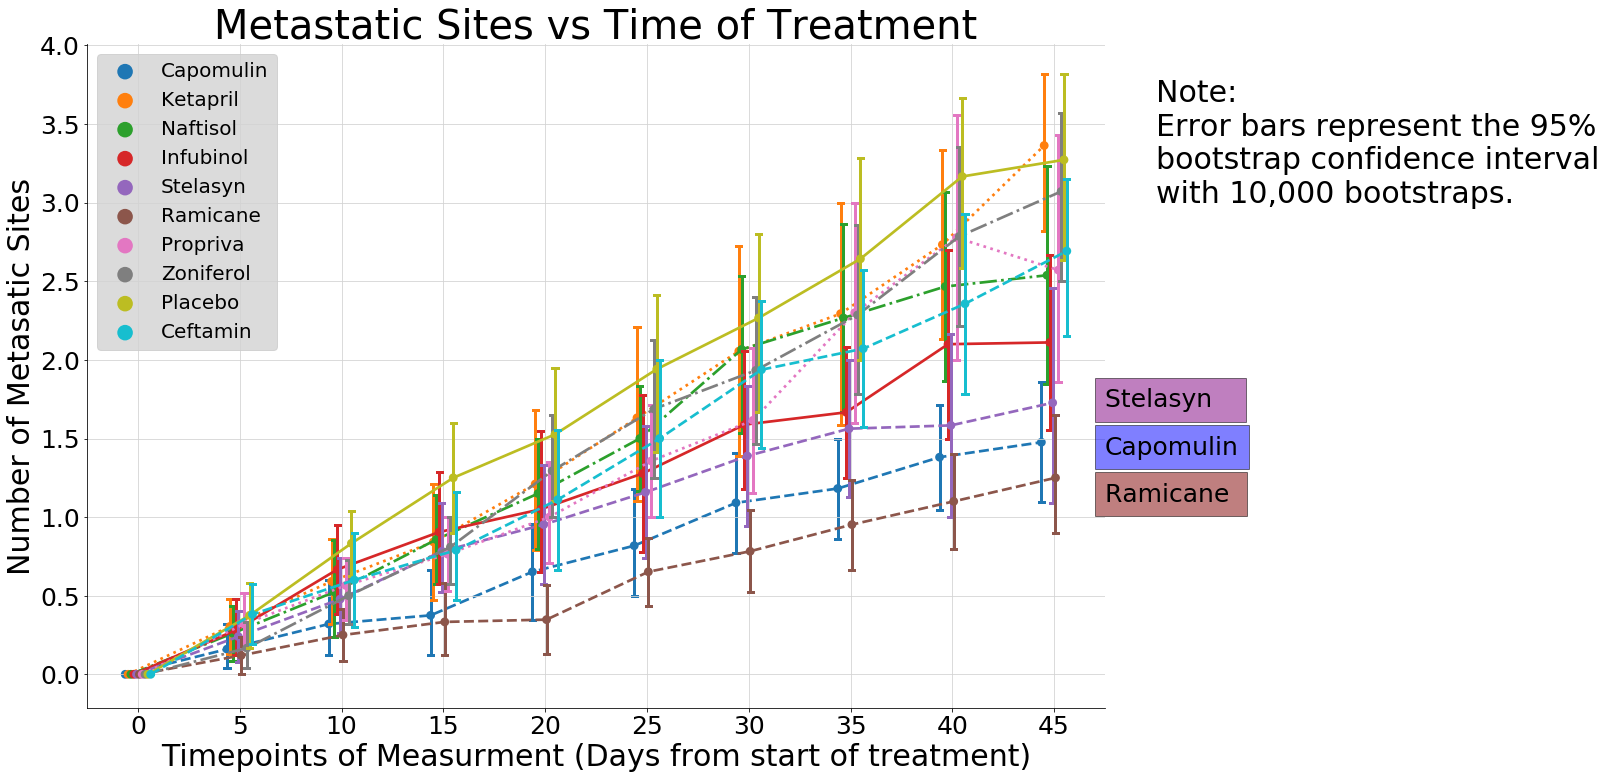

In [103]:
g1 = sns.factorplot(x='Timepoint',
                   y='Metastatic Sites',
                   hue='Drug',
                   data=drug_response_df,
                   size=10,
                   aspect=1.5,
                   ci=95,
                   n_boot=10000,
                   legend=False,
                   errwidth=3,
                   capsize=.05,
                   dodge=True,
                   linestyles=['--',':','-.','-','--','--',':','-.','-','--']
                  )
ax1 = g1.ax
ax1.text(10,3,'Note: \nError bars represent the 95% \nbootstrap confidence interval \nwith 10,000 bootstraps.').set_fontsize(30)
ax1.text(9.5,1.4, 'Capomulin', bbox=dict(facecolor='blue', alpha=.5)).set_fontsize(25)
ax1.text(9.5,1.1, 'Ramicane ', bbox=dict(facecolor='maroon', alpha=.5)).set_fontsize(25)
ax1.text(9.5,1.7, 'Stelasyn   ', bbox=dict(facecolor='purple', alpha=.5)).set_fontsize(25)
ax1.legend(loc='upper left', fontsize=20, markerscale=2, frameon=True, facecolor='lightgrey')
ax1.set_title('Metastatic Sites vs Time of Treatment').set_fontsize(40)
ax1.grid(color='lightgrey')
ax1.set_xlabel('Timepoints of Measurment (Days from start of treatment)').set_fontsize(30)
ax1.set_ylabel('Number of Metasatic Sites').set_fontsize(30)
ax1.tick_params(which='major', labelsize=25)
ax1.set_facecolor("white")
g1.savefig('metastatic_sites.png')